Here we will use the TF Agents to train the CartPole environment with DQN.
TF Agents package makes the implementation of RL algo easier.

In [2]:
import tensorflow as tf
from tf_agents.environments import suite_gym

In [3]:
env = suite_gym.load("CartPole-v1")

In [4]:
env

In [5]:
env.gym

<TimeLimit<OrderEnforcing<CartPoleEnv<CartPole-v1>>>>

In [6]:
env.reset()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.03297429, -0.01906034, -0.03026932, -0.04020157], dtype=float32)})

In [7]:
env.step(0)

TimeStep(
{'step_type': array(1),
 'reward': array(1., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.03259308, -0.21373545, -0.03107335,  0.24277951], dtype=float32)})

Explore Environment Specification

In [8]:
env.observation_spec()

BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])

In [9]:
env.action_spec()

BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)

In [10]:
env.time_step_spec()

TimeStep(
{'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type'),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])})

In [11]:
env.reward_spec()

ArraySpec(shape=(), dtype=dtype('float32'), name='reward')

In [12]:
env.discount_spec()

BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0)

In [13]:
env.current_time_step()

TimeStep(
{'step_type': array(1),
 'reward': array(1., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.03259308, -0.21373545, -0.03107335,  0.24277951], dtype=float32)})

Wrap the environment with TFPyEnvironment which supports both py and tf environments.

In [14]:
from tf_agents.environments.tf_py_environment import TFPyEnvironment

In [15]:
env = TFPyEnvironment(env)

In [16]:
env

In [17]:
env.reset()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.02358962,  0.03141514, -0.03042728,  0.04864902]],
      dtype=float32)>})

In [18]:
env.step(0)

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.02296132, -0.1632576 , -0.0294543 ,  0.33157873]],
      dtype=float32)>})

In [19]:
env.observation_spec()

BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32))

In [20]:
env.action_spec()

BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64))

In [21]:
env.time_step_spec()

TimeStep(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32))})

In [22]:
env.reward_spec()

TensorSpec(shape=(), dtype=tf.float32, name='reward')

In [23]:
env.discount_spec()

BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0)

In [24]:
env.current_time_step()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.02296132, -0.1632576 , -0.0294543 ,  0.33157873]],
      dtype=float32)>})

Create a Deep Q Network

In [25]:
from tf_agents.networks.q_network import QNetwork

In [26]:
help(QNetwork)

Help on class QNetwork in module tf_agents.networks.q_network:

class QNetwork(tf_agents.networks.network.Network)
 |  QNetwork(input_tensor_spec, action_spec, preprocessing_layers=None, preprocessing_combiner=None, conv_layer_params=None, fc_layer_params=(75, 40), dropout_layer_params=None, activation_fn=<function relu at 0x000001560075E5C0>, kernel_initializer=None, batch_squash=True, dtype=tf.float32, q_layer_activation_fn=None, name='QNetwork')
 |  
 |  Feed Forward network.
 |  
 |  Method resolution order:
 |      QNetwork
 |      tf_agents.networks.network.Network
 |      keras.src.engine.base_layer.Layer
 |      tensorflow.python.module.module.Module
 |      tensorflow.python.trackable.autotrackable.AutoTrackable
 |      tensorflow.python.trackable.base.Trackable
 |      keras.src.utils.version_utils.LayerVersionSelector
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_tensor_spec, action_spec, preprocessing_layers=None, preprocessing_combine

In [27]:
q_net = QNetwork(env.observation_spec(), env.action_spec())

Create a DQN agent

In [28]:
from tf_agents.agents.dqn.dqn_agent import DqnAgent
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers.schedules import PolynomialDecay

In [29]:
help(DqnAgent)

Help on class DqnAgent in module tf_agents.agents.dqn.dqn_agent:

class DqnAgent(tf_agents.agents.tf_agent.TFAgent)
 |  DqnAgent(time_step_spec: tf_agents.trajectories.time_step.TimeStep, action_spec: Union[tensorflow.python.framework.type_spec.TypeSpec, tensorflow.python.framework.tensor.TensorSpec, tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec, tensorflow.python.framework.sparse_tensor.SparseTensorSpec, ForwardRef('tf_agents.distributions.utils.DistributionSpecV2'), Iterable[ForwardRef('NestedTensorSpec')], Mapping[str, ForwardRef('NestedTensorSpec')]], q_network: tf_agents.networks.network.Network, optimizer: Union[keras.src.optimizers.optimizer.Optimizer, tensorflow.python.training.optimizer.Optimizer], observation_and_action_constraint_splitter: Optional[Callable[[Union[tensorflow.python.framework.type_spec.TypeSpec, tensorflow.python.framework.tensor.TensorSpec, tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec, tensorflow.python.framework.sparse_tensor.Sp

In [30]:
optimizer = Adam(learning_rate=0.001)
loss = MeanSquaredError('none', 'mean_squared_error')
loss_fn = loss.call
discount_factor = 0.95
epsilon_fn = PolynomialDecay(
    initial_learning_rate=1.0,
    decay_steps=1600,
    end_learning_rate=0.0,
    power=1
    )
target_model_update = 50
train_step = tf.Variable(0)

agent = DqnAgent(
    env.time_step_spec(),
    env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    gamma=discount_factor,
    td_errors_loss_fn=loss_fn,
    epsilon_greedy=lambda:epsilon_fn(train_step),
    train_step_counter=train_step,
    target_update_period=target_model_update,
)

In [31]:
env.time_step_spec()

TimeStep(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32))})

In [32]:
agent.initialize()

Create a Replay Buffer to store experiences

In [33]:
from tf_agents.replay_buffers.tf_uniform_replay_buffer import TFUniformReplayBuffer

In [34]:
agent.collect_data_spec

Trajectory(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)),
 'action': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64)),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32))})

In [35]:
replay_buffer = TFUniformReplayBuffer(
    data_spec= agent.collect_data_spec,
    batch_size= env.batch_size,
    max_length= 10000
)

Create an observer to write into the replay buffer

In [36]:
replay_buffer_observer = replay_buffer.add_batch

In [37]:
replay_buffer

In [38]:
replay_buffer_observer

<bound method ReplayBuffer.add_batch of <tf_agents.replay_buffers.tf_uniform_replay_buffer.TFUniformReplayBuffer object at 0x0000015603840B10>>

Create a Driver that explores environment using a given policy, collects experience and broadcast them to observer.

In [39]:
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver
from tf_agents.metrics import tf_metrics

In [40]:
train_metrics = [
    tf_metrics.AverageReturnMetric()
]

In [41]:
collect_driver = DynamicStepDriver(
    env=env,
    policy= agent.collect_policy,
    observers= [replay_buffer_observer] + train_metrics,
    num_steps=100
)

In [42]:
train_metrics[0].result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

Create a driver to just fill the replay buffer with some experiences with a random policy

In [43]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy

In [44]:
initial_collect_policy = RandomTFPolicy(env.time_step_spec(), env.action_spec())

In [45]:
initial_collect_policy

In [46]:
initial_driver = DynamicStepDriver(
    env,
    initial_collect_policy,
    [replay_buffer_observer],
    num_steps=1000
)

In [47]:
final_time_step, final_policy_state = initial_driver.run()

In [48]:
final_time_step

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 7.8460239e-02, -3.8251477e-01, -2.0286982e-04,  5.2276886e-01]],
      dtype=float32)>})

In [49]:
final_policy_state

()

Create a Dataset of sample a batch of trajectories for agent to train.

In [50]:
from tf_agents.trajectories.trajectory import to_transition

In [51]:
trajectories, buffer_info = replay_buffer.get_next(sample_batch_size=2, num_steps=3)

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [52]:
trajectories

Trajectory(
{'step_type': <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]])>,
 'observation': <tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[-0.04653021, -0.03298026, -0.03113363, -0.120386  ],
        [-0.04718982,  0.1625736 , -0.03354136, -0.42272645],
        [-0.04393835, -0.03205751, -0.04199588, -0.14080329]],

       [[ 0.02501486,  0.16101441,  0.03516561, -0.2775992 ],
        [ 0.02823515, -0.03459112,  0.02961363,  0.02596427],
        [ 0.02754333, -0.23012497,  0.03013291,  0.32784158]]],
      dtype=float32)>,
 'action': <tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[1, 0, 1],
       [0, 0, 0]], dtype=int64)>,
 'policy_info': (),
 'next_step_type': <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]])>,
 'reward': <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>,
 'discount': <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.

In [53]:
buffer_info

BufferInfo(ids=<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[746, 747, 748],
       [ 51,  52,  53]], dtype=int64)>, probabilities=<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.00095602, 0.00095602], dtype=float32)>)

In [54]:
time_steps, action_steps, next_time_steps = to_transition(trajectories)

In [55]:
time_steps

TimeStep(
{'step_type': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]])>,
 'reward': <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>,
 'discount': <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>,
 'observation': <tf.Tensor: shape=(2, 2, 4), dtype=float32, numpy=
array([[[-0.04653021, -0.03298026, -0.03113363, -0.120386  ],
        [-0.04718982,  0.1625736 , -0.03354136, -0.42272645]],

       [[ 0.02501486,  0.16101441,  0.03516561, -0.2775992 ],
        [ 0.02823515, -0.03459112,  0.02961363,  0.02596427]]],
      dtype=float32)>})

In [56]:
action_steps

PolicyStep(action=<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[1, 0],
       [0, 0]], dtype=int64)>, state=(), info=())

In [57]:
dataset = replay_buffer.as_dataset(
    sample_batch_size=128,
    num_steps=2,
)

In [58]:
dataset

<_MapDataset element_spec=(Trajectory(
{'step_type': TensorSpec(shape=(128, 2), dtype=tf.int32, name=None),
 'observation': TensorSpec(shape=(128, 2, 4), dtype=tf.float32, name=None),
 'action': TensorSpec(shape=(128, 2), dtype=tf.int64, name=None),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(128, 2), dtype=tf.int32, name=None),
 'reward': TensorSpec(shape=(128, 2), dtype=tf.float32, name=None),
 'discount': TensorSpec(shape=(128, 2), dtype=tf.float32, name=None)}), BufferInfo(ids=TensorSpec(shape=(128, 2), dtype=tf.int64, name=None), probabilities=TensorSpec(shape=(128,), dtype=tf.float32, name=None)))>

In [59]:
it = iter(dataset)

In [60]:
it

In [61]:
next(it)

(Trajectory(
 {'step_type': <tf.Tensor: shape=(128, 2), dtype=int32, numpy=
 array([[1, 1],
        [1, 1],
        [1, 1],
        [2, 0],
        [1, 1],
        [2, 0],
        [1, 1],
        [1, 2],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [2, 0],
        [2, 0],
        [1, 1],
        [1, 2],
        [1, 1],
        [1, 2],
        [1, 2],
        [1, 

In [62]:
next(it)[0]

Trajectory(
{'step_type': <tf.Tensor: shape=(128, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [2, 0],
       [1, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 

Create a training loop

In [63]:
from tf_agents.utils.common import function

In [64]:
collect_driver.run

<bound method DynamicStepDriver.run of <tf_agents.drivers.dynamic_step_driver.DynamicStepDriver object at 0x000001560383A110>>

In [65]:
agent.train

<bound method TFAgent.train of <tf_agents.agents.dqn.dqn_agent.DqnAgent object at 0x000001565FF54610>>

In [66]:
collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)

In [67]:
collect_driver.run

In [68]:
agent.train

In [69]:
agent.collect_policy.get_initial_state(env.batch_size)

()

In [70]:
collect_driver.run(None, ())

(TimeStep(
 {'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
  'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
  'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
  'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
 array([[ 0.03337283,  0.18590651, -0.17194998, -0.7338841 ]],
       dtype=float32)>}),
 ())

In [71]:
ts, ps = collect_driver.run(None,())

In [72]:
trajectories, buffer_info = next(it)

In [73]:
trajectories

Trajectory(
{'step_type': <tf.Tensor: shape=(128, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [2, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 

In [74]:
agent.training_data_spec

Trajectory(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)),
 'action': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64)),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32))})

In [75]:
agent.train_sequence_length

2

In [76]:
agent.train(trajectories)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


LossInfo(loss=<tf.Tensor: shape=(), dtype=float32, numpy=1.0429308>, extra=DqnLossInfo(td_loss=<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264,
       1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264,
       1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264,
       1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264,
       1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264,
       1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264,
       1.0853264, 1.0853264, 0.       , 1.0853264, 1.0853264, 1.0853264,
       1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264,
       1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264,
       1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264, 1.0853264,
       1.0853264, 0.       , 1.0853264, 1.0853264, 1.0853264, 1.0853264,
       0.       , 1.0853264, 1.0853264, 1.0853264, 0. 

In [77]:
def train_agent(n_iteration):
    losses = []
    avg_returns = []
    train_step.assign(0)
    time_step = None
    policy_state = agent.collect_policy.get_initial_state(env.batch_size)
    iterator = iter(dataset)

    for iteration in range(n_iteration):
        time_step, policy_state = collect_driver.run(time_step, policy_state)
        trajectories, buffer_info = next(iterator)
        train_loss = agent.train(trajectories)
        loss = train_loss.loss.numpy()
        avg_return = train_metrics[0].result().numpy()
        losses.append(loss)
        avg_returns.append(avg_return)
        if train_step%50 == 0:
            print(f'train step: {train_step.value()}      loss: {loss}     avg_return: {avg_return}')

    return losses, avg_returns
        

In [78]:
losses, avg_returns = train_agent(2000)

train step: 50      loss: 1.0331037044525146     avg_return: 16.5
train step: 100      loss: 1.2153359651565552     avg_return: 17.100000381469727
train step: 150      loss: 1.284913420677185     avg_return: 23.600000381469727
train step: 200      loss: 1.0926604270935059     avg_return: 20.700000762939453
train step: 250      loss: 0.9317574501037598     avg_return: 18.899999618530273
train step: 300      loss: 0.9085379242897034     avg_return: 17.600000381469727
train step: 350      loss: 0.9430125951766968     avg_return: 33.29999923706055
train step: 400      loss: 1.1868312358856201     avg_return: 24.600000381469727
train step: 450      loss: 0.7493051290512085     avg_return: 38.70000076293945
train step: 500      loss: 1.9475162029266357     avg_return: 65.0999984741211
train step: 550      loss: 1.5751426219940186     avg_return: 53.900001525878906
train step: 600      loss: 1.20961594581604     avg_return: 53.0
train step: 650      loss: 1.6753227710723877     avg_return: 62

Visualizing results

In [79]:
import pandas as pd

<Axes: >

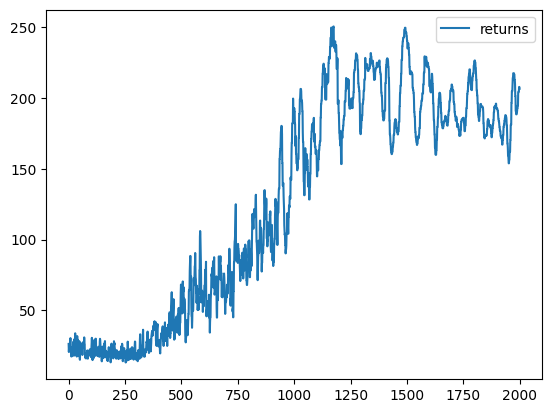

In [81]:
pd.DataFrame({'returns': avg_returns}).plot()

<Axes: >

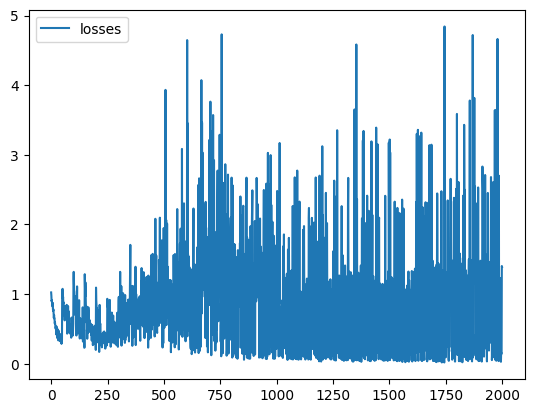

In [82]:
pd.DataFrame({'losses': losses}).plot()

Create a evaluation environment to test policy

In [124]:
eval_py_env = suite_gym.load('CartPole-v1')

In [125]:
eval_tf_env = TFPyEnvironment(eval_py_env)

In [126]:
eval_py_env.reset()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.04382595, -0.02935016, -0.02053633, -0.01220229], dtype=float32)})

In [127]:
eval_tf_env.reset()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.04247502, -0.03643599, -0.0249455 , -0.01637346]],
      dtype=float32)>})

In [128]:
eval_py_env.current_time_step()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.04247502, -0.03643599, -0.0249455 , -0.01637346], dtype=float32)})

In [129]:
eval_tf_env.current_time_step()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.04247502, -0.03643599, -0.0249455 , -0.01637346]],
      dtype=float32)>})

In [130]:
eval_tf_env.close()

In [131]:
eval_tf_env.current_time_step()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.04247502, -0.03643599, -0.0249455 , -0.01637346]],
      dtype=float32)>})

In [132]:
eval_py_env.close()

In [133]:
eval_py_env.current_time_step()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.04247502, -0.03643599, -0.0249455 , -0.01637346], dtype=float32)})

In [134]:
policy = agent.policy

In [139]:
policy

In [135]:
policy.action(eval_tf_env.current_time_step())

PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0], dtype=int64)>, state=(), info=())

In [136]:
for _ in range(10):
    time_step = eval_tf_env.reset()

    while not time_step.is_last():
        time_step = eval_tf_env.step(policy.action(time_step))
        eval_py_env.render(mode='human')

eval_py_env.close()

In [123]:
eval_py_env.close()

Save a trained agent policy to be used in another program

In [137]:
from tf_agents.policies.policy_saver import PolicySaver

In [ ]:
policy_saver = PolicySaver(policy= agent.policy, batch_size=None)